## SPARC-4 mini-pipeline tools
# Quarter-wave polarimetry

This notebook shows an example for obtaining a polarimetric analysis of a set of observations using the SPARC4 instrument in polarimetric mode with a quarter-wave rotating plate. It takes as input a series of science imaging products obtained with the SPARC4 pipeline.

* Eder Martioli, LNA 10 Jun 2023

In [1]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
# path_parent = "/Volumes/Samsung_T5/sparc4-pipeline/"
sys.path.append(path_parent) 

import glob

import sparc4_pipeline_lib as s4pipelib
import sparc4_utils as s4utils
import sparc4_product_plots as s4plt

/Users/eder/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## User inputs

In [2]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "HD111579"
OBJECT_SUFFIX = "hd1l4"

# set night directory name
NIGHTDIR = '20230503'
# set raw data root directory
DATADIR =  "/Volumes/Samsung_T5/Data/SPARC4/minidata/"
# set reduced data root directory
REDUCEDDIR = "/Volumes/Samsung_T5/Data/SPARC4/minidata/reduced/"

# set SPARC4 channel
CHANNEL = 1  # 1, 2, 3 or 4

# whether or not to force reduction even if product already exists
FORCE = True

# get SPARC4 pipeline parameters
p = s4pipelib.init_s4_p(datadir=DATADIR,
                        reducedir=REDUCEDDIR,
                        nightdir=NIGHTDIR,
                        channels="{}".format(CHANNEL),
                        print_report=False)

# Calculate `QUARTER-WAVE` POLARIMETRY

In [3]:
# set wild card to identify polarimetric sequence
l4seq_wild_card = "_{}_proc.fits".format(OBJECT_SUFFIX)

# produce list of reduced polarimetry frames in the sequence
l4seq = glob.glob("{}/*{}".format(p['reduce_directories'][CHANNEL-1], l4seq_wild_card))

# compute polarimetry and save it into a .FITS polarimetry product
polarL4product = s4pipelib.compute_polarimetry(l4seq, 
                                               wave_plate='quarterwave', 
                                               compute_k=False,
                                               fit_zero=True,                                               
                                               zero=p['ZERO_OF_WAVEPLATE'],
                                               force=FORCE)

2023-06-11 04:56:31,949 astropop - INFO - Normalization disabled.  [__init__]


Number of sources in catalog: 2
Number of apertures: 49  varying from 2.0 to 50.0 in steps of 1.0 pix
Calculating quarterwave polarimetry for source 1 of 2
Calculating quarterwave polarimetry for source 2 of 2
Saving output quarterwave polarimetry product: /Volumes/Samsung_T5/Data/SPARC4/minidata/reduced//sparc4acs1//20230503/20230503_s4c1_001525_hd1l4_l4_polar.fits


# Check POLARIMETRY results

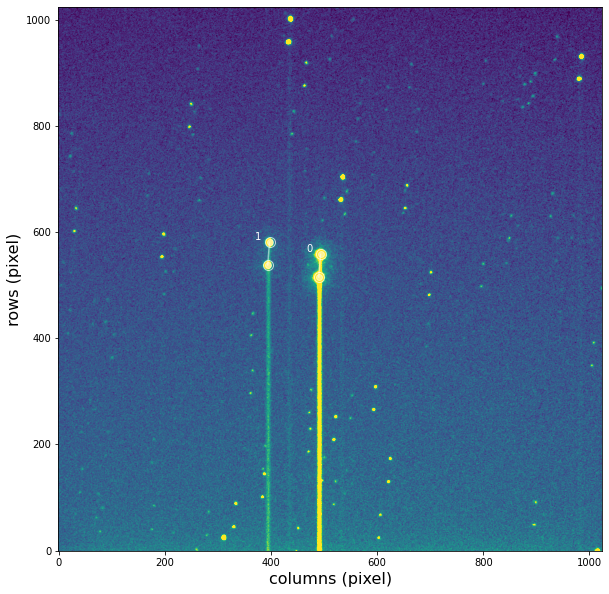

In [4]:
# First, check your target index in the stack image:
stack_img = "{}/{}_s4c{}_{}_POL_L4_stack.fits".format(p['reduce_directories'][CHANNEL-1],NIGHTDIR,CHANNEL,OBJECTID.replace(" ",""))

# plot polar stack img
s4plt.plot_sci_polar_frame(stack_img, percentile=99.5)

Source index: i=0 
Source RA=100.5330062998416 Dec=-23.73084576419247 mag=-13.6946+-0.0004
Best aperture radius: 11 pixels
Polarization in Q: 0.0152+-0.0006
Polarization in U: 0.0615+-0.0009
Polarization in V: 0.0005+-0.0004
Total linear polarization p: 0.0634+-0.0008
Angle of polarization theta: 38.0+-0.4
Free constant k: 1.0+-nan
Zero of polarization: 38.8+-0.2
RMS of zi residuals: 0.00101
Reduced chi-square (n=16, DOF=11): 0.84


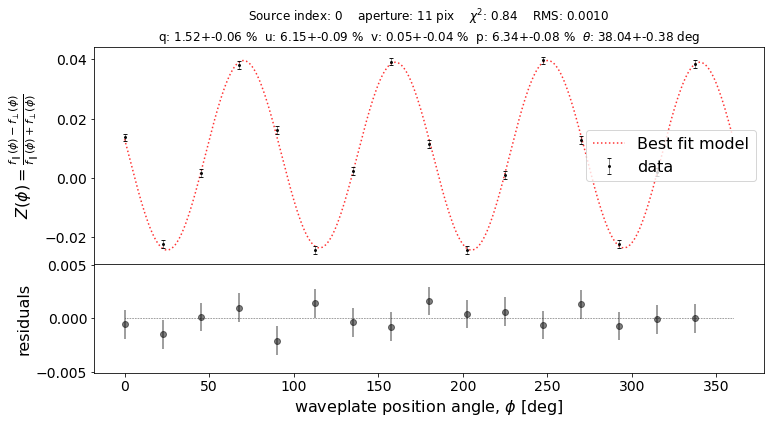

In [5]:
# set target index (check the number next to your star in the stack image above)
target_index = 0

# read polarimetry results for a selected target index
pol_results = s4pipelib.get_polarimetry_results(polarL4product,
                                                source_index=target_index,
                                                min_aperture=p['MIN_APERTURE_FOR_POLARIMETRY'],
                                                max_aperture=p['MAX_APERTURE_FOR_POLARIMETRY'],
                                                plot=True,
                                                verbose=True)

In [ ]:
# print polarimetry results
print(pol_results)